# Série de Taylor exponencial

## Função

Escolhemos a função exponencial:

$f(x) = e^x$

para apresentar uma simulação de cálculos e funções complexas que podem ser processadas.

### Série de taylor para função exponencial:

${\displaystyle \mathrm {e} ^{x}=\sum _{n=0}^{\infty }{\frac {x^{n}}{n!}}\quad}$ para todo $x$

Determinaremos um valor limite de N com base em sua precisão e margem de erro.

## Definindo a função

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import math

def e_x(x, n_max=10):

    total = 0.0
    for n in range(0, n_max ):
        numero = (math.pow(x,n))/math.factorial(n)
        total+= numero
    return total
print(e_x(2))
print(np.exp(2))

7.3887125220458545
7.38905609893065


## Comparação entre as funções 

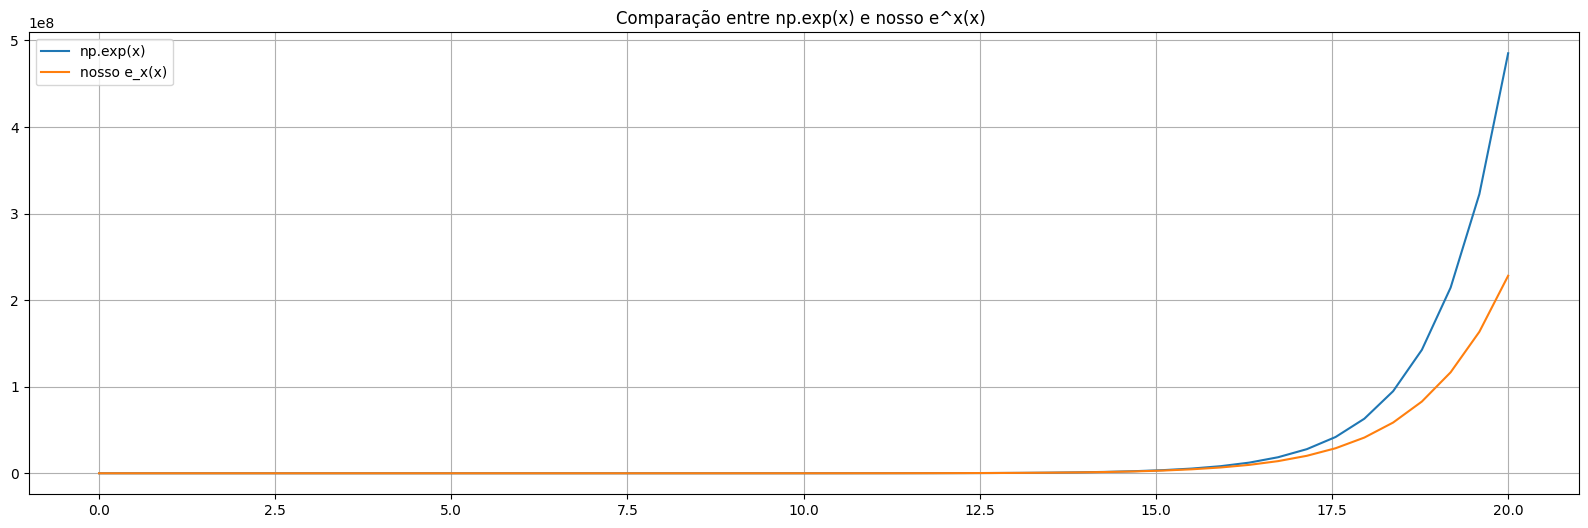

In [3]:
valor_x = np.linspace(0, 20)
f1_valores = [np.exp(x) for x in valor_x]
f2_valores = [e_x(x,20) for x in valor_x]

plt.figure(figsize=(20, 6))
plt.plot(valor_x, f1_valores, label='np.exp(x)')
plt.plot(valor_x, f2_valores, label='nosso e_x(x)')
plt.legend()
plt.title('Comparação entre np.exp(x) e nosso e^x(x) ')
plt.grid(True)
plt.show()

**Observação.:** Quanto maior o seu valor de X, maior o seu N deverá ser para obter mais precisão

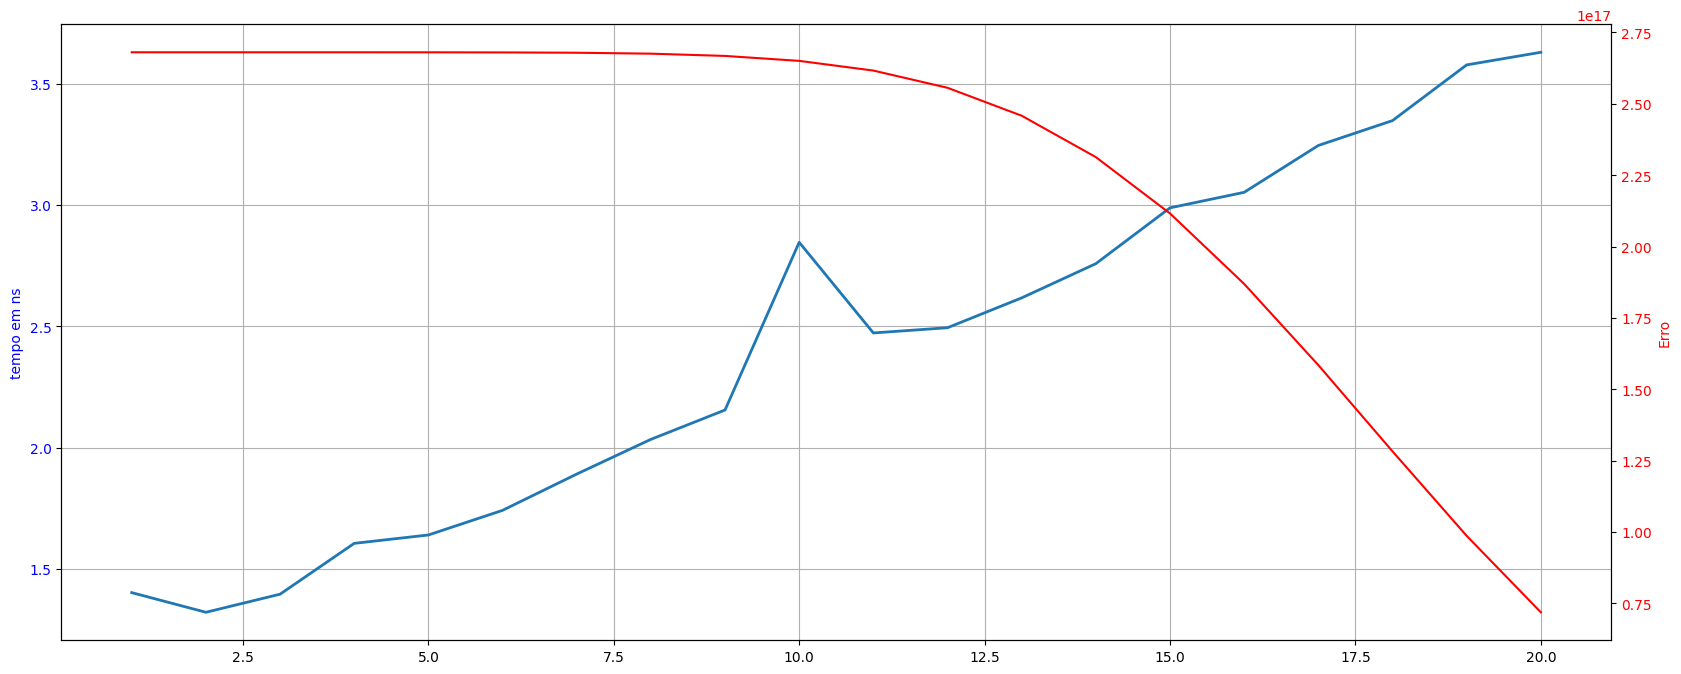

In [9]:
n_max = 20

enes = np.arange(1,n_max+1)
medias = np.zeros(n_max)
error = np.zeros(n_max)
x = np.linspace(0, 20, 20)


def tempo(x,n):
  start = timeit.default_timer()
  valor = e_x(x,n)
  loss_function = pow(valor - np.exp(x),2) # erro quadrático
  return timeit.default_timer() - start, loss_function

# https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html
tempo_vector = np.vectorize(tempo)
for n in enes:
  calc, erro = tempo_vector(x,n)
  medias[n-1] = np.mean(calc)*1000*1000 # microssegundos
  error[n-1] = np.sum(erro)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(20,8)
ax.plot(enes, medias, linewidth=2.0)
ax.grid()
color = "blue"
ax.set_ylabel('tempo em ns', color=color)
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

# plotando 2 gráficos com escalas diferentes
color = "red"
ax2.set_ylabel('Erro', color=color)
ax2.plot(enes, error, color=color)
ax2.tick_params(axis='y', labelcolor=color)


A partir do gráfico, é possível observar que o valor de N mais ideal em relação a Tempo de Execução x Taxa de Erro é, em média 16.

## Aproximação de Taylor em várias ordens

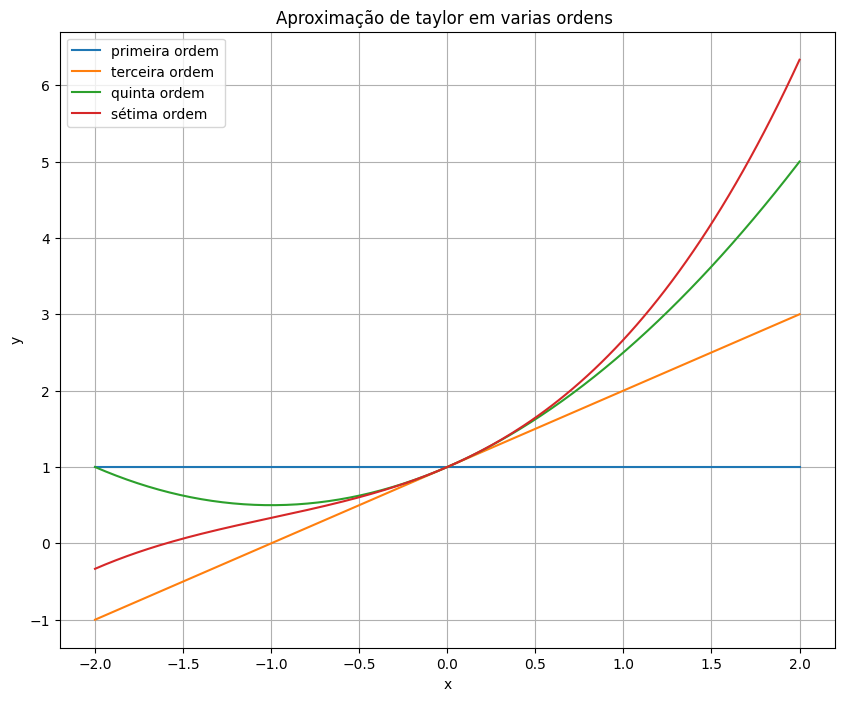

In [13]:
x = np.linspace(-2, 2, 200)
y = np.zeros(len(x))

legenda = ['primeira ordem', 'terceira ordem', 'quinta ordem', 'sétima ordem']

plt.figure(figsize=(10, 8))
for n, label in zip(range(4), legenda):
    y = y + (x**n) / math.factorial(n)
    plt.plot(x, y, label=label)

plt.grid()
plt.title('Aproximação de taylor em varias ordens ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Como a função $f(x) = e^x$ consegue calcular todos os $x$ em todos os $N's$, você consegue ter uma tabela de valores tão grande quanto se queira. Nesse caso, são as aproximações que também seria algo usado nas tabelas.

# Tabela de valores

In [14]:
tabela = {
    0:1,
    1:2.71828182846,
    2:7.38905609893,
    3:20.0855369232,
    4:54.5981500331

}

def e_x_tab(x, n_max):
    if x in tabela:
      return tabela[x]
    else:
      return e_x(x,n_max)


print(e_x_tab(2,10))

7.38905609893


# Referências

- [Séries de Taylor - Wikipédia](https://pt.wikipedia.org/wiki/S%C3%A9rie_de_Taylor)
- [Expansão de e^x](https://www.youtube.com/watch?v=QfU-7XdKW5c)
- [Séries de Taylor com cosseno](https://colab.research.google.com/drive/14a6wnOOOv8yzfvRtfHvMoGIkOAIQnoJN?usp=sharing#scrollTo=AC1IYWaWYTcF)
- [Propriedades da função exponencial](https://mundoeducacao.uol.com.br/matematica/propriedades-funcao-exponencial.htm)